In [7]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

#create a custom colormap named cmap_hold using the ListedColrmap class
from matplotlib.colors import ListedColormap
cmap_hold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [10]:
#map each iris species to a number
# this dictionary maps each iris species to a numerical value
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

<Axes: xlabel='petal_length', ylabel='petal_width'>

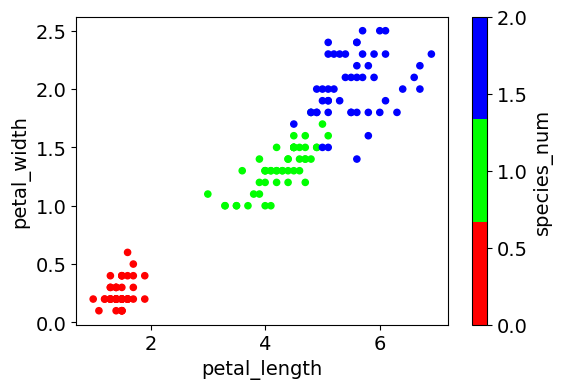

In [11]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', cmap=cmap_hold)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

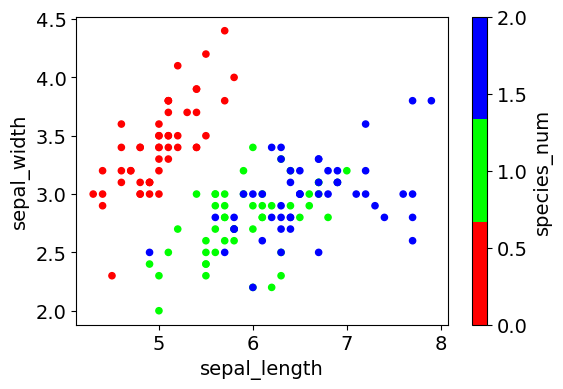

In [12]:
#create a scatter plot of SEPAL LENGTH verus SEPAL WIDTH and colour by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', cmap=cmap_hold)

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [14]:
# start feature matrix in "A"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# This line extracts the Feature matrix from a dataset named iris and stores it in a variable called X.
K = iris[feature_cols]

In [15]:
# demonstrate different methods to create a feature matrix X from a dataset named iris
X = iris.drop(['species', 'species_num'], axis=1)
X = iris.loc[:, 'sepal_length': 'petal_width']
X = iris.iloc[:, 0:4]

In [16]:
# stare response vector in "y"
y= iris.species_num

In [17]:
# check X's type
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [18]:
# check y's type
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [19]:
# check x's shape(n= number of observations, p=number of features)
print(X.shape)

(150, 4)


In [20]:
# check y's shape(single dimensions with length n)
print(y.shape)

(150,)


In [21]:
# scikit-learn 4-step
# This class is used for implementing the K-Nearest Neighbours (KNN) algorithm for classification tasks
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# make an instance of a KNeighboursClassifier object
# initializes the KNeighbourClassifier object with the parameters n_neighbour set to 1
# meaning it will consider only the nearest neighbour when making prediction

knn= KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [23]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [24]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.predict([[3,5,4,2]])

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [26]:
k_new = [[3,5,4,2], [5,4,3,2]]
knn.predict(k_new)

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 1])

In [27]:
#instantiate the model (using the value X=5)
knn = KNeighborsClassifier(n_neighbors=5)

#fit the model with data
knn.fit(X,y)

#predict the response for new observations
knn.predict(k_new)

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1])

In [28]:
# calculate predicted probabilities of class memebrship
knn.predict_proba(k_new)

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])